<a href="https://colab.research.google.com/github/cesargar1507/DatasetsUB/blob/main/M6_AI3_GarciaCesar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Estudiante:** César Emilio García Ávalos

**Actividad:** M6_AI3_Reconocimiento de números escritos a mano

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
from sklearn.model_selection import GridSearchCV

**1. Lectura del dataset desde TensorFlow.**

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Ground Truth: 5


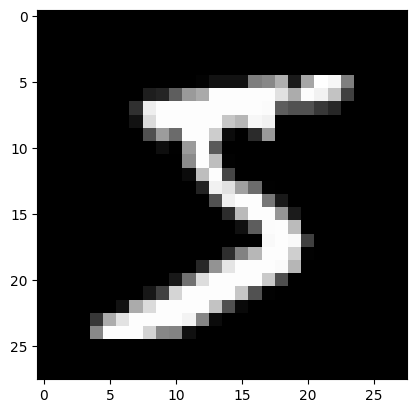

In [3]:
plt.imshow(x_train[0], cmap='gray')
print('Ground Truth: %s'%(y_train[0]))

Ground Truth: 2


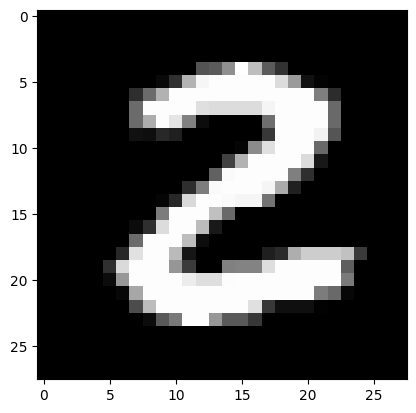

In [4]:
plt.imshow(x_train[25], cmap='gray')
print('Ground Truth: %s'%(y_train[25]))

Ground Truth: 8


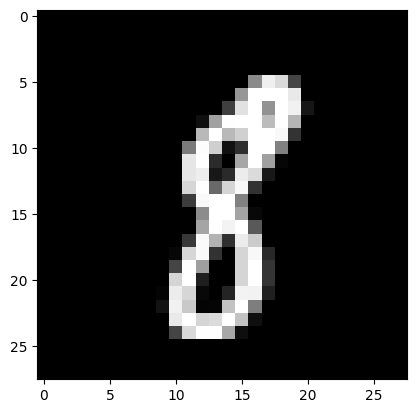

In [5]:
plt.imshow(x_train[300], cmap='gray')
print('Ground Truth: %s'%(y_train[300]))

**2. Aplicar las conversiones necesarias para pasar de 3d-array a 2d-array (con “reshape”).**

In [6]:
# Normalización de los datos a un rango de 0 a 1
x_train = x_train / 255.0
x_test = x_test / 255.0

Normalizar los valores de píxeles de las imágenes para asegurar que estén en el rango [0, 1]. Esto facilita el entrenamiento del modelo y mejora la convergencia del mismo.

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
# Conversión de 3D-Array a 2D-Array
x_train = x_train.reshape(60000, -1)
x_test = x_test.reshape(10000, -1)

Aplanar las matrices de imágenes de 28x28 píxeles a vectores de 784 píxeles (28 * 28). Esta transformación es necesaria porque muchos algoritmos de aprendizaje automático, incluido RandomForest, esperan datos en forma de matriz bidimensional.

**3. Crear la variable “n_train” para poder generar diferentes modelos**

**4. Modelo para n_train = 600 y 6000**

**4.1 Modelo con n_train=600**

In [9]:
n_train = 600
x_train1 = x_train[0:n_train]
y_train1 = y_train[0:n_train]

In [10]:
model = RandomForestClassifier()
model.fit(x_train1, y_train1)

RandomForestClassifier()

In [11]:
# precting the model
y_pred = model.predict(x_test)
model.score(x_test, y_test)
accuracy_score(y_pred, y_test)

0.8553

In [12]:
print ("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       980
           1       0.91      0.98      0.94      1135
           2       0.86      0.86      0.86      1032
           3       0.86      0.83      0.84      1010
           4       0.84      0.82      0.83       982
           5       0.81      0.73      0.77       892
           6       0.89      0.84      0.86       958
           7       0.89      0.89      0.89      1028
           8       0.89      0.76      0.82       974
           9       0.74      0.85      0.79      1009

    accuracy                           0.86     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.86      0.85     10000



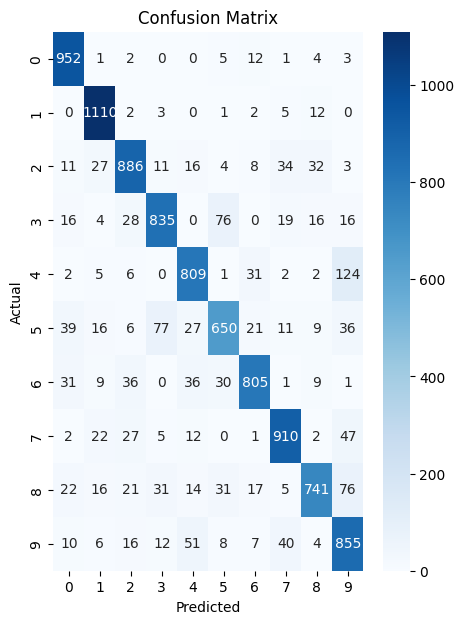

In [13]:
# Generar y mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix')
plt.show()

**Precision para cada clase:** Por ejemplo, la precisión para la clase 0 es 0.87. Esto significa que el 87% de las veces que el modelo predijo la clase 0, realmente era la clase 0.

**Precision ponderada (weighted avg):** Es la media de la precisión de todas las clases, ponderada por el soporte (número de instancias verdaderas de cada clase). En este caso, es 0.86.

**Recall para cada clase:** Por ejemplo, el recall para la clase 0 es 0.97. Esto significa que el modelo identificó correctamente el 97% de todas las instancias verdaderas de la clase 0.

**Recall ponderado (weighted avg):** Es la media del recall de todas las clases, ponderada por el soporte. Aquí, es 0.85.

**F1-score para cada clase:** Por ejemplo, el F1-score para la clase 0 es 0.92, que es una medida combinada de precision y recall para la clase 0.

**F1-score ponderado (weighted avg):** Es la media del F1-score de todas las clases, ponderada por el soporte. Aquí, es 0.85.

**Exactitud total:** En este caso, es 0.85, lo que significa que el modelo predijo correctamente el 85% de las imágenes en el conjunto de prueba.

**Análisis general:**
El modelo muestra un rendimiento razonablemente bueno con una exactitud del 85%, lo que indica que está clasificando correctamente la mayoría de las imágenes.
Sin embargo, hay variabilidad en el rendimiento entre las diferentes clases. Por ejemplo, las clases 5 y 8 tienen un recall más bajo (0.73 y 0.76 respectivamente), lo que indica que el modelo tiene más dificultad para identificar correctamente estas clases en comparación con otras.
Las clases con mejores resultados incluyen el 0, 1, 6 y 7, con precisiones y recalls altos.

**4.2 Modelo con n_train=6000**

In [14]:
n_train = 6000
x_train2 = x_train[0:n_train]
y_train2 = y_train[0:n_train]

In [15]:
model = RandomForestClassifier()
model.fit(x_train2, y_train2)

RandomForestClassifier()

In [16]:
# precting the model
y_pred = model.predict(x_test)
model.score(x_test, y_test)
accuracy_score(y_pred, y_test)
print ("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.94      0.93      0.93      1032
           3       0.94      0.92      0.93      1010
           4       0.92      0.95      0.93       982
           5       0.94      0.92      0.93       892
           6       0.95      0.96      0.96       958
           7       0.94      0.93      0.94      1028
           8       0.93      0.91      0.92       974
           9       0.92      0.92      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



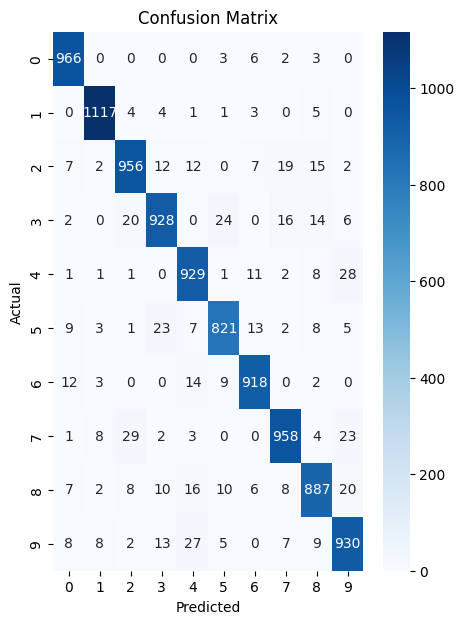

In [17]:
# Generar y mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix')
plt.show()

**Precision para cada clase:** Por ejemplo, la precisión para la clase 0 es 0.95. Esto significa que el 95% de las veces que el modelo predijo la clase 0, realmente era la clase 0.

**Precision ponderada (weighted avg):** Es la media de la precisión de todas las clases, ponderada por el soporte (número de instancias verdaderas de cada clase). En este caso, es 0.94.

**Recall para cada clase:** Por ejemplo, el recall para la clase 0 es 0.99. Esto significa que el modelo identificó correctamente el 99% de todas las instancias verdaderas de la clase 0.

**Recall ponderado (weighted avg):** Es la media del recall de todas las clases, ponderada por el soporte. Aquí, es 0.94.

**F1-score para cada clase:** Por ejemplo, el F1-score para la clase 0 es 0.97, que es una medida combinada de precision y recall para la clase 0.

**F1-score ponderado (weighted avg):** Es la media del F1-score de todas las clases, ponderada por el soporte. Aquí, es 0.94.

**Exactitud total:** En este caso, es 0.94, lo que significa que el modelo predijo correctamente el 94% de las imágenes en el conjunto de prueba.

**Análisis general:** Este modelo muestra un rendimiento excelente con una exactitud del 94%, lo que indica que está clasificando correctamente la gran mayoría de las imágenes.
La precisión y el recall son altos para la mayoría de las clases, con valores que oscilan entre 0.91 y 0.99, lo cual es muy bueno.
No obstante, algunas clases tienen un rendimiento ligeramente inferior en términos de precision y recall (por ejemplo, las clases 2, 3, 4, 8 y 9).
El F1-score también es alto y uniforme en general, indicando un buen equilibrio entre precision y recall para la mayoría de las clases.

**5. Realizar diferentes modelos cambiando los valores de n_estimators y max_depth y búsqueda de mejores hiperparámetros con Gridsearch**

In [18]:
# Definir la rejilla de parámetros
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Entrenar el modelo con GridSearchCV
grid_search.fit(x_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Mejores hiperparámetros: {'max_depth': None, 'n_estimators': 200}


Se define una cuadrícula de parámetros (param_grid) para buscar la mejor combinación de hiperparámetros para RandomForest.
Se utiliza GridSearchCV para buscar a través de diferentes combinaciones de parámetros (n_estimators y max_depth).

**cv** indica validación cruzada de 3 pliegues para evaluar cada combinación de parámetros.

**n_jobs** utiliza todos los núcleos disponibles para acelerar el proceso de búsqueda.

**verbose** proporciona información detallada sobre el progreso durante el ajuste del modelo.

**max_depth:**
En este caso, max_depth=30 indica que los árboles pueden crecer hasta una profundidad de 30 niveles.

**n_estimators:**
n_estimators=200 indica que se están utilizando 200 árboles en el modelo RandomForest.


In [19]:
# Predecir y evaluar el modelo con los mejores hiperparámetros
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

In [20]:
# Reporte de clasificación
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.96      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



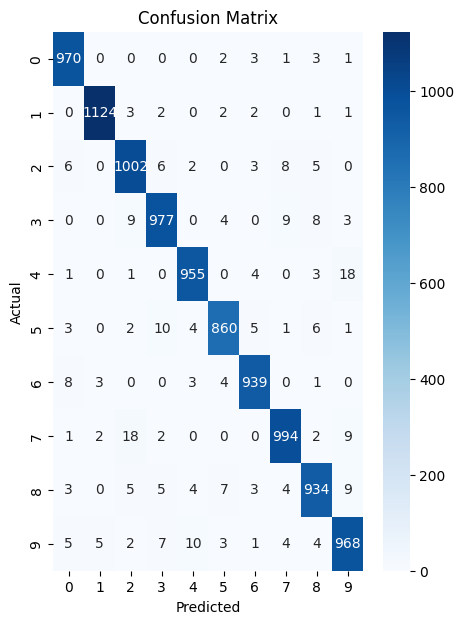

In [21]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**6. Comentario de los modelos**

**Mejora:** Comparado con los modelos anteriores, el modelo optimizado con GridSearchCV ha mejorado considerablemente, alcanzando una precisión, recall y F1-score de 0.97 en promedio. Esto indica una mejora sustancial en la capacidad del modelo para clasificar correctamente los dígitos del conjunto de datos MNIST.

**Consistencia:** Los altos valores de precision, recall y F1-score en todas las clases sugieren que el modelo es consistente y preciso en la predicción de cada dígito.

**Estabilidad del modelo:** La precisión y el recall balanceados indican que el modelo no está sobreajustando (overfitting) ni subajustando (underfitting) significativamente en ninguna clase particular.

En resumen, los resultados muestran que el ajuste de hiperparámetros utilizando GridSearchCV ha sido efectivo para mejorar el rendimiento del modelo RandomForest en la clasificación de dígitos MNIST.